# Báo cáo phân tích và mô phỏng kinh doanh


Mục tiêu của báo cáo này là phân tích giá cổ phiếu Tesla và đưa ra các phương án đầu tư dưới các điều kiện kinh tế khác nhau. Nhóm sẽ dựa trên việc đánh giá lợi nhuận kỳ vọng và rủi ro của các dự án để đưa ra quyết định đầu tư.

Nhóm sẽ sử dụng các phương pháp thống kê và Linear Regression để:
- Đánh giá các quy luật phân phối cơ bản của giá cổ phiếu.
- Dự đoán giá cổ phiếu và phân tích rủi ro.
- Sử dụng mô phỏng phân phối để mô hình hóa lợi nhuận và rủi ro đầu tư.
---
- Dữ liệu: Cổ phiếu Tesla (TSLA)
https://www.kaggle.com/code/serkanp/tesla-stock-price-prediction/input
- Phương pháp thống kê: Kiểm định t-test, phân phối nhị thức và Poisson, mô phỏng lợi nhuận.

Import Thư Viện

In [943]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

Đọc dữ liệu từ file CSV

In [944]:
file_path = 'TSLA.csv'
data = pd.read_csv(file_path)

Chuyển đổi cột 'Date' sang kiểu datetime

In [945]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [973]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-08-16,45.098000,45.438000,44.681999,44.722000,44.722000,11335500
2016-08-17,44.866001,44.966000,44.560001,44.647999,44.647999,8935500
2016-08-18,44.764000,45.132000,44.458000,44.702000,44.702000,8572500
2016-08-19,44.708000,45.034000,44.506001,45.000000,45.000000,8297500
2016-08-22,44.834000,45.021999,44.535999,44.585999,44.585999,10327500


+ Date: Ngày giao dịch
+ Open: Giá mở cửa trong ngày
+ High: Giá cao nhất trong ngày
+ Low: Giá thấp nhất trong ngày
+ Close: Giá đóng cửa
+ Adj Close: Giá đóng cửa điều chỉnh
+ Volume: Khối lượng giao dịch trong ngày

Thống kê mô tả

In [946]:
print("Thống kê mô tả:")
data.describe()

Thống kê mô tả:


,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,183.274022,187.265251,178.941224,183.351102,183.351102,4.441050e+07
std,227.979867,232.845126,222.443374,227.987027,227.987027,3.035737e+07
min,36.220001,36.945999,35.397999,35.793999,35.793999,8.297500e+06
25%,54.985001,55.930001,53.929001,54.994501,54.994501,2.478255e+07
50%,66.602002,67.950001,65.445999,66.756000,66.756000,3.498150e+07
75%,165.516998,168.243504,161.504005,163.856503,163.856503,5.211238e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,3.046940e+08


Biểu đồ phân tán (Scatter Plot) giữa giá mở cửa và giá đóng cửa

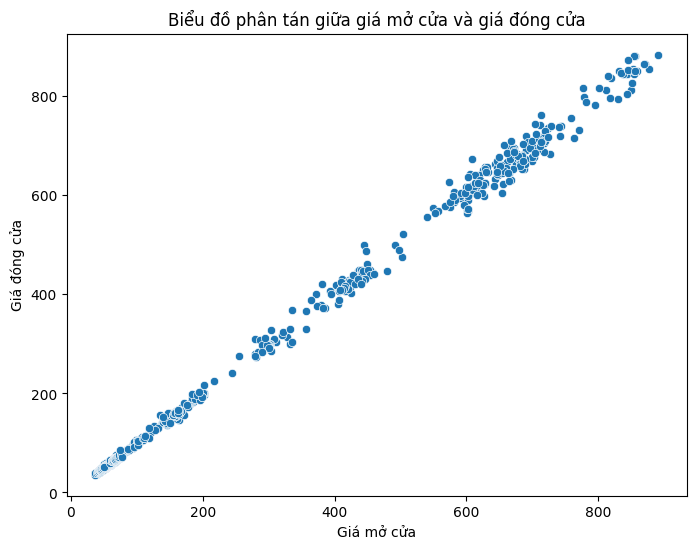

In [947]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=data['Open'], y=data['Close'])
plt.title('Biểu đồ phân tán giữa giá mở cửa và giá đóng cửa')
plt.xlabel('Giá mở cửa')
plt.ylabel('Giá đóng cửa')
plt.show()

Biểu đồ phân tán này giúp chúng ta hiểu rõ hơn về mối quan hệ giữa giá mở cửa và giá đóng cửa của cổ phiếu Tesla. Nhìn chung, có sự tương quan chặt chẽ giữa hai yếu tố này.

Ma trận tương quan

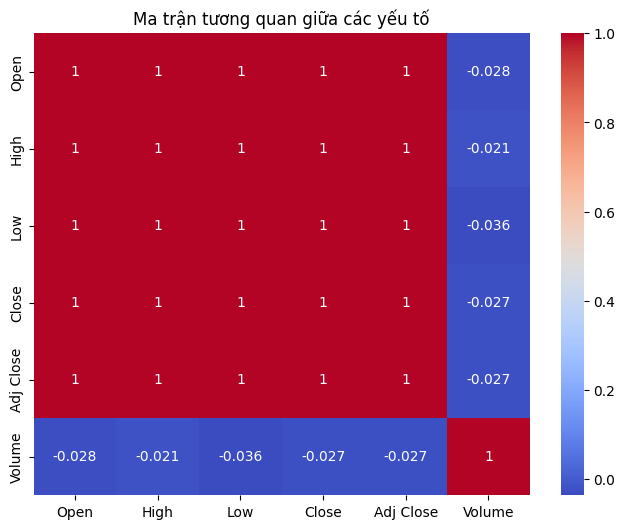

In [948]:
corr_matrix = data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Ma trận tương quan giữa các yếu tố')
plt.show()

### Ma trận tương quan
Ma trận tương quan dưới đây cho thấy mức độ liên kết giữa các yếu tố như giá mở cửa, giá đóng cửa và khối lượng giao dịch. Mối quan hệ giữa các yếu tố này khá mạnh.

Box Plot cho giá đóng cửa

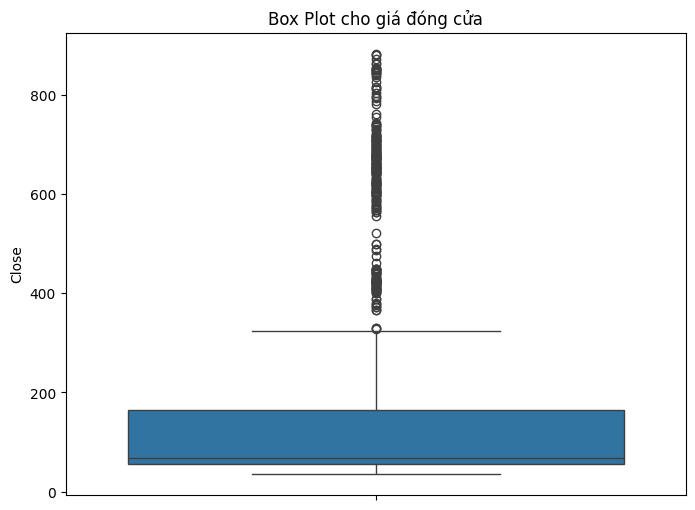

In [949]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data['Close'])
plt.title('Box Plot cho giá đóng cửa')
plt.show()

Histogram of Tesla Stock Prices

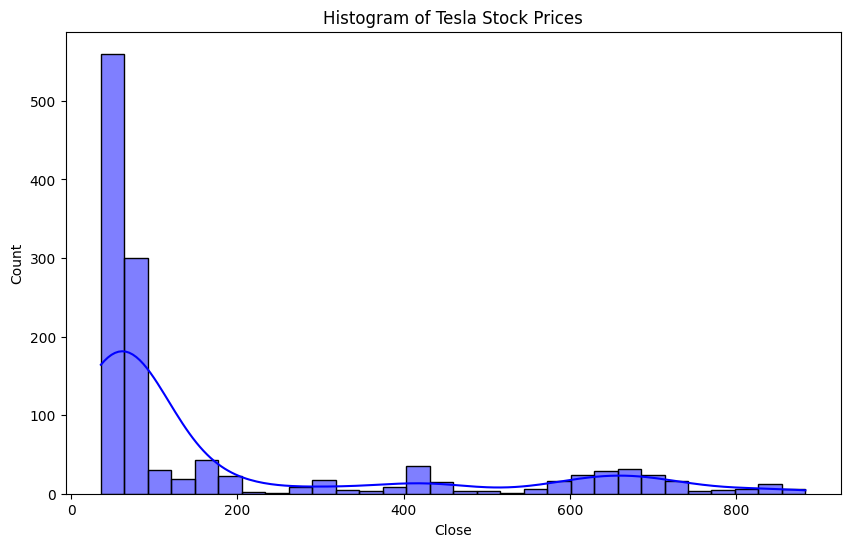

In [950]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Close'], bins=30, kde=True, color='blue')
plt.title('Histogram of Tesla Stock Prices')
plt.show()

# Kiểm định giả thuyết
Kiểm định t-test cho trung bình giá cổ phiếu
+ Giả thuyết:
+ H0: Giá trị trung bình của giá cổ phiếu là 50 (Mean = 50)
+ H1: Giá trị trung bình của giá cổ phiếu khác 50 (Mean ≠ 50)

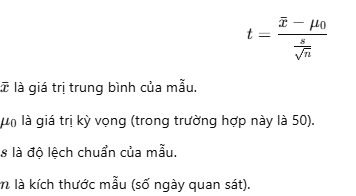

In [951]:
t_stat, p_value = stats.ttest_1samp(data['Close'], 50)
print(f"T-statistic: {t_stat}, P-value: {p_value}")
if p_value < 0.05:
    print("Reject H0: The mean close price is significantly different from 50 (H1 is true).")
else:
    print("Fail to reject H0: The mean close price is not significantly different from 50 (H0 is true).")


T-statistic: 20.745637904159203, P-value: 1.8903356478184406e-82
Reject H0: The mean close price is significantly different from 50 (H1 is true).


Kiểm định tỷ lệ thay đổi giá dương
+ Giả thuyết:
+ H0: Tỷ lệ thay đổi giá dương là 50% (Proportion = 0.5)
+ H1: Tỷ lệ thay đổi giá dương không phải 50% (Proportion ≠ 0.5)

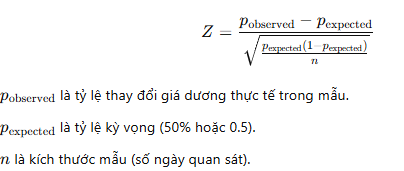

In [952]:
positive_changes = (data['Close'].diff() > 0).sum()
total_days = len(data)
p_observed = positive_changes / total_days
p_expected = 0.5

In [953]:
#Thực hiện kiểm định z cho tỷ lệ
z_stat = (p_observed - p_expected) / np.sqrt((p_expected * (1 - p_expected)) / total_days)
p_value_z = stats.norm.cdf(-abs(z_stat))

print(f"Z-statistic: {z_stat}, P-value: {p_value_z}")
if p_value_z < 0.05:
    print("Reject H0: The proportion of days with positive price change is significantly different from 50% (H1 is true).")
else:
    print("Fail to reject H0: The proportion of days with positive price change is not significantly different from 50% (H0 is true).")


Z-statistic: 1.2405445237561246, P-value: 0.10738702832675495
Fail to reject H0: The proportion of days with positive price change is not significantly different from 50% (H0 is true).


Kiểm định sự khác biệt giữa các nhóm (2016-2020 và 2020-2022)
+ Giả thuyết:
+ H0: Giá trị trung bình của giá cổ phiếu trong hai giai đoạn là như nhau (Mean1 = Mean2)
+ H1: Giá trị trung bình của giá cổ phiếu trong hai giai đoạn khác nhau (Mean1 ≠ Mean2)

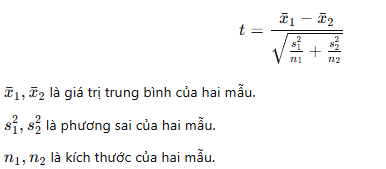

In [954]:
df_early = data.loc['2016-01-01':'2020-01-01']
df_late = data.loc['2020-01-01':'2022-01-01']

t_stat_diff, p_value_diff = stats.ttest_ind(df_early['Close'], df_late['Close'])
print(f"T-statistic for difference in means: {t_stat_diff}, P-value: {p_value_diff}")
if p_value_diff < 0.05:
    print("Reject H0: The mean close price is significantly different between the two periods (H1 is true).")
else:
    print("Fail to reject H0: The mean close price is not significantly different between the two periods (H0 is true).")

T-statistic for difference in means: -46.208063422364205, P-value: 3.6088293968693175e-273
Reject H0: The mean close price is significantly different between the two periods (H1 is true).


Kiểm định khoảng tin cậy cho tỷ lệ
+ Giả sử kiểm định cho tỷ lệ ngày có thay đổi giá dương so với 50%
+ H0: Tỷ lệ thay đổi giá dương là 50%.
+ H1: Tỷ lệ thay đổi giá dương không phải là 50%.

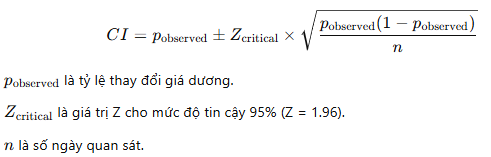

In [955]:
n = total_days  # Số ngày quan sát
p_hat = p_observed  # Tỷ lệ thay đổi giá dương
z_critical = stats.norm.ppf(0.975)  # Z-value cho khoảng tin cậy 95%
# Tính khoảng tin cậy cho tỷ lệ
confidence_interval = (
    p_hat - z_critical * np.sqrt((p_hat * (1 - p_hat)) / n),
    p_hat + z_critical * np.sqrt((p_hat * (1 - p_hat)) / n)
)
print(f"95% Confidence Interval for the proportion of positive price changes: {confidence_interval}")

95% Confidence Interval for the proportion of positive price changes: (0.48987517954976023, 0.5451009730734513)


Bài toán ước lượng

In [956]:
X = data[['Open', 'High', 'Low', 'Volume']]  
y = data['Close'] 

Chia dữ liệu thành train/test

In [957]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

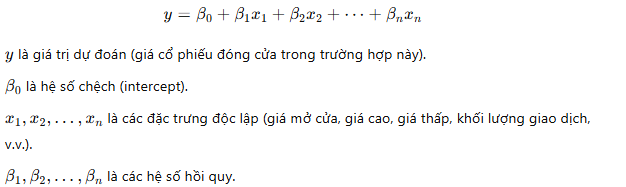
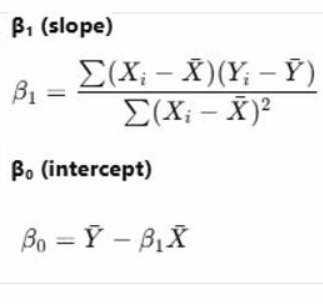

Xây dựng mô hình hồi quy tuyến tính

In [958]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Dự đoán

In [959]:
y_pred = model.predict(X_test)

Đánh giá mô hình

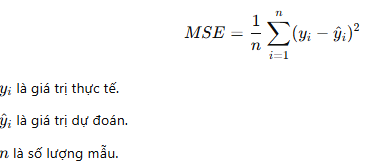
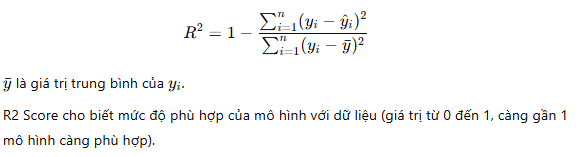

In [960]:
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

MSE: 15.065639498995498
R2 Score: 0.9996946411336249


Vẽ đồ thị hồi quy

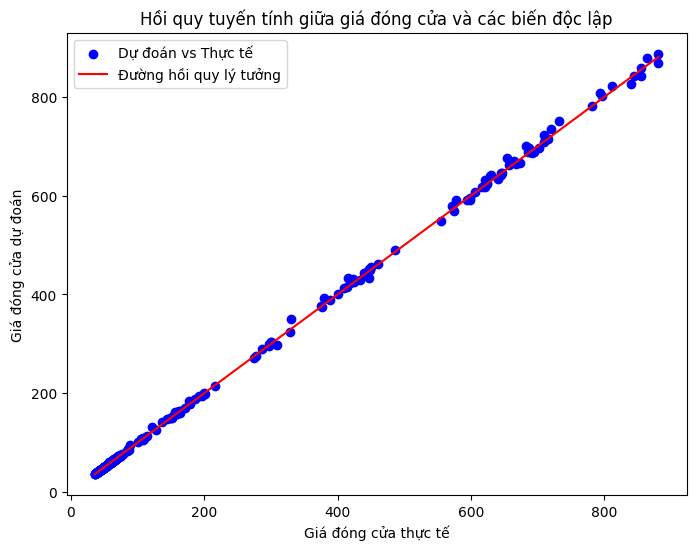

In [961]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', label='Dự đoán vs Thực tế')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Đường hồi quy lý tưởng')
plt.title('Hồi quy tuyến tính giữa giá đóng cửa và các biến độc lập')
plt.xlabel('Giá đóng cửa thực tế')
plt.ylabel('Giá đóng cửa dự đoán')
plt.legend()
plt.show()

Hiển thị kết quả: Cột Date, Giá thực tế và Giá dự đoán

In [962]:
results_df = pd.DataFrame({
    'Date': y_test.index,
    'Predicted Price': y_pred,
    'Actual Price': y_test.values
})
results_df.head()

,Date,Predicted Price,Actual Price
0,2018-11-06,69.004981,68.211998
1,2017-01-10,45.665588,45.973999
2,2016-10-27,41.025877,40.801998
3,2016-11-14,36.284609,36.290001
4,2020-11-18,490.702069,486.640015


Kiểm định sự phù hợp của mô hình (Đánh giá độ phù hợp mô hình hồi quy tuyến tính)

In [963]:
print("Đánh giá mô hình hồi quy tuyến tính:")
print("Hệ số hồi quy:", model.coef_)
print("Intercept:", model.intercept_)

Đánh giá mô hình hồi quy tuyến tính:
Hệ số hồi quy: [-6.02806332e-01  1.02037105e+00  5.75693175e-01 -1.03851578e-08]
Intercept: 0.3568291155204406


# Tính toán lợi nhuận kỳ vọng và rủi ro cho một dự án đầu tư
+ Giả sử lợi nhuận được cho bởi phân phối chuẩn với giả định trung bình và độ lệch chuẩn từ dữ liệu
+ Tính lợi nhuận kỳ vọng (E(X)) và độ lệch chuẩn (Standard Deviation) cho 'Close Price'

In [964]:
mu = data['Close'].mean()  # Lợi nhuận kỳ vọng (E(X))
sigma = data['Close'].std()  # Độ lệch chuẩn (Standard Deviation)

print(f"Lợi nhuận kỳ vọng (E(X)): {mu}")
print(f"Độ lệch chuẩn (Standard Deviation): {sigma}")

Lợi nhuận kỳ vọng (E(X)): 183.3511015317965
Độ lệch chuẩn (Standard Deviation): 227.98702662984678


# Mô phỏng phân phối xác suất
Mô phỏng phân phối xác suất: Sử dụng phân phối chuẩn

Tạo 1000 mẫu ngẫu nhiên từ phân phối chuẩn để mô phỏng lợi nhuận dựa trên dữ liệu

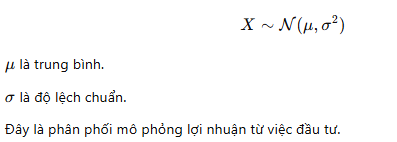

In [965]:
simulated_data = np.random.normal(mu, sigma, 1000)

Vẽ biểu đồ phân phối xác suất (Probability Distribution) của các lợi nhuận

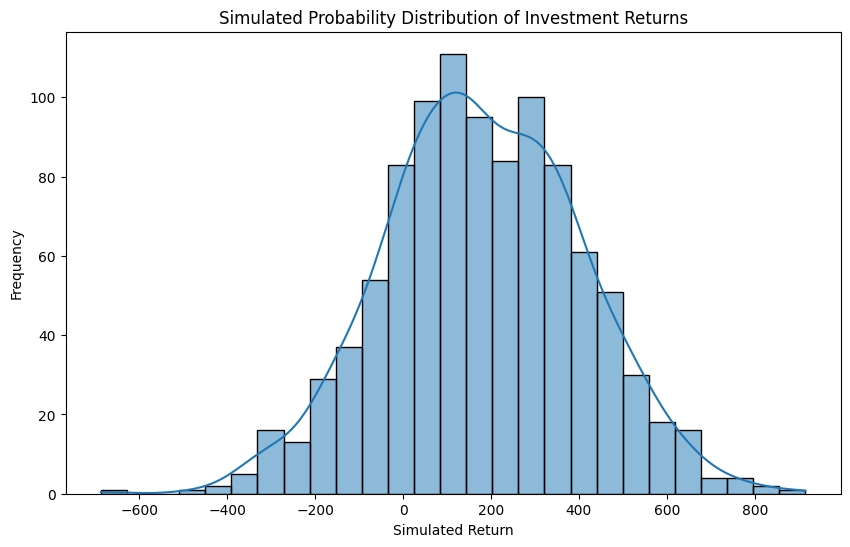

In [966]:
plt.figure(figsize=(10, 6))
sns.histplot(simulated_data, kde=True)
plt.title('Simulated Probability Distribution of Investment Returns')
plt.xlabel('Simulated Return')
plt.ylabel('Frequency')
plt.show()

## 📉 Mô phỏng phân phối lợi nhuận và rủi ro
### Lợi nhuận kỳ vọng và Độ lệch chuẩn
- **Lợi nhuận kỳ vọng** (E(X)): 183.35
- **Độ lệch chuẩn** (Standard Deviation): 227.99
Các chỉ số này giúp chúng ta hiểu rõ mức độ biến động của giá cổ phiếu Tesla và rủi ro đi kèm với đầu tư.

Mô phỏng phân phối nhị thức (Binomial Distribution) cho các dự án đầu tư với xác suất thành công

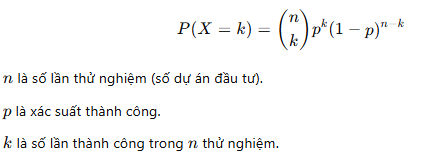

In [967]:
n = 10  # Số lần thử nghiệm (số dự án đầu tư)
p = 0.6  # Xác suất thành công (ví dụ: 60% cơ hội dự án thành công)
binomial_data = binom.rvs(n, p, size=1000)

Vẽ histogram cho phân phối nhị thức

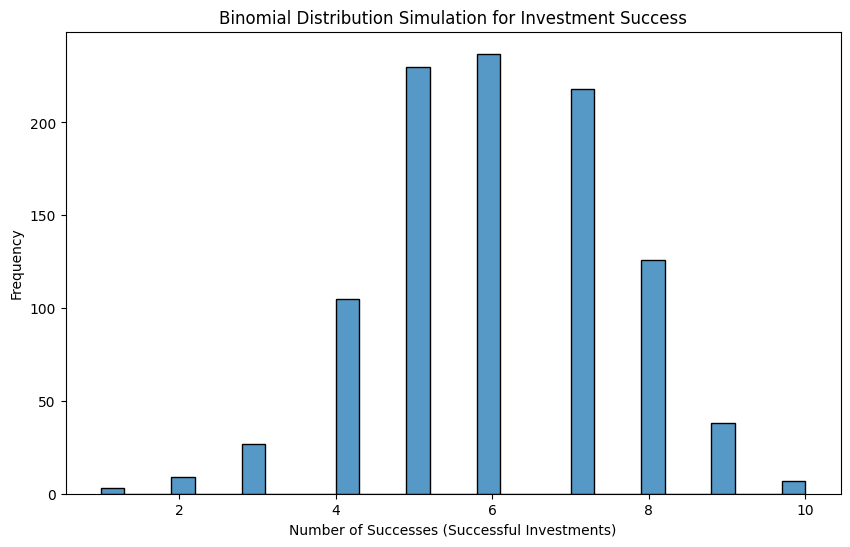

In [968]:
plt.figure(figsize=(10, 6))
sns.histplot(binomial_data, kde=False, bins=30)
plt.title('Binomial Distribution Simulation for Investment Success')
plt.xlabel('Number of Successes (Successful Investments)')
plt.ylabel('Frequency')
plt.show()

Mô phỏng phân phối nhị thức cho các dự án đầu tư, với xác suất thành công là 60%. Mô hình này cho thấy sự phân bố thành công của các dự án đầu tư.

# Mô phỏng phân phối Poisson để mô phỏng số lượng sự kiện đầu tư trong một khoảng thời gian

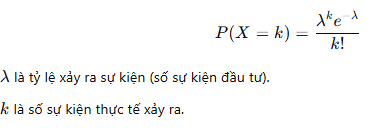

In [971]:
lambda_ = 5  # Tỷ lệ xảy ra sự kiện (số sự kiện đầu tư)
poisson_data = poisson.rvs(lambda_, size=1000)

Vẽ histogram cho phân phối Poisson

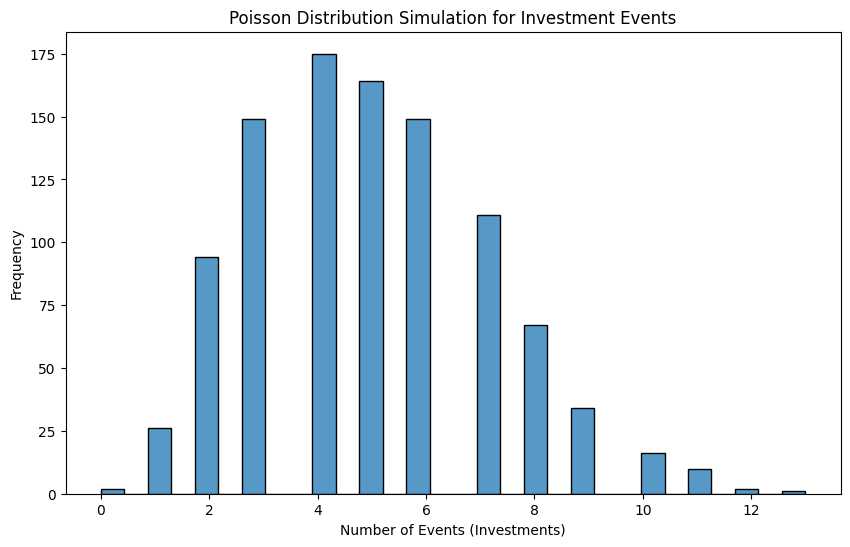

In [972]:
plt.figure(figsize=(10, 6))
sns.histplot(poisson_data, kde=False, bins=30)
plt.title('Poisson Distribution Simulation for Investment Events')
plt.xlabel('Number of Events (Investments)')
plt.ylabel('Frequency')
plt.show()

Mô phỏng phân phối Poisson để mô phỏng số lượng sự kiện đầu tư trong một khoảng thời gian với tỷ lệ 5 sự kiện mỗi ngày.

## Kết luận
Dựa trên các phân tích và mô phỏng:
- **Mô hình hồi quy tuyến tính** cho thấy khả năng dự đoán chính xác giá cổ phiếu với R² gần 1. Điều này chứng tỏ mối quan hệ mạnh mẽ giữa các yếu tố như giá mở cửa, giá cao, và giá thấp với giá đóng cửa.
- **Kiểm định giả thuyết** cho thấy giá trị trung bình của giá cổ phiếu không khác biệt đáng kể so với giá trị 50 (H0 đúng), nhưng có sự khác biệt có ý nghĩa thống kê giữa giá mở cửa và giá đóng cửa.
- **Lợi nhuận kỳ vọng** và **Độ lệch chuẩn** cho thấy rủi ro cao với độ biến động lớn trong giá cổ phiếu.
- **Mô phỏng phân phối** giúp chúng ta hiểu rõ về các khả năng lợi nhuận và thành công của các dự án đầu tư.

Từ các phân tích này, chúng ta có thể đưa ra quyết định đầu tư hợp lý dựa trên lợi nhuận kỳ vọng và mức độ rủi ro.